In [2]:
import music21
from music21 import midi, instrument, converter

In [3]:
fname = "clean_midi/3T/Why.mid"
mf = midi.MidiFile()
mf.open(filename=fname, attrib="rb")
mf.read()
print(mf)
print(mf.tracks[0])

<music21.midi.MidiFile 18 tracks>
<music21.midi.MidiTrack 0 -- 6 events>


In [4]:
mt = mf.tracks[0]
print(mt.events)
print(mt.data)

[<MidiEvent DeltaTime, t=0, track=0, channel=None>, <MidiEvent TIME_SIGNATURE, t=0, track=0, channel=None, data=b'\x04\x02\x18\x08'>, <MidiEvent DeltaTime, t=0, track=0, channel=None>, <MidiEvent SET_TEMPO, t=0, track=0, channel=None, data=b'\x0c5\x00'>, <MidiEvent DeltaTime, t=0, track=0, channel=None>, <MidiEvent END_OF_TRACK, t=0, track=0, channel=None, data=b''>]
b'\x00\xffX\x04\x04\x02\x18\x08\x00\xffQ\x03\x0c5\x00\x00\xff/\x00'


In [5]:
s2 = instrument.partitionByInstrument(converter.parse(fname))
print(type(s2))

<class 'music21.stream.Score'>


In [9]:
for part in s2.parts:
    if "Piano" == part.partName:
        print(part)
        print(part.partName)
        notes = part.recurse()

<music21.stream.Part Piano>
Piano


In [35]:
parsed_note = []
for note in notes:
    if isinstance(note, music21.note.Note):
        note_example = note
        parsed_note.append(str(note.pitch))
    elif isinstance(note, music21.chord.Chord):
        chord_example = note
        parsed_note.append('.'.join(str(n) for n in note.normalOrder))

In [38]:
print(note_example.pitches[0].ps)
print(chord_example.notes[0].pitches[0].ps)

61.0
66.0


In [23]:
print(parsed_note)

['6.8.10.1', '6.8.10.1', '6.8.11.2', '6.8.11.2', '8.10.1.3', '8.10.1.3', '8.10.1.4', '3.7.10', '8.10.11.3', '8.10.11.3', '7.9.11.2', '7.9.2', 'B3', '6.8.10.1', '8.10.1', 'F#3', 'F#3', '11.1', '11.3.6', '11.4', 'G#3', '6.8.10.1', '4.8', 'B3', '6.10.1', 'G#3', '3.6.10', 'B3', '2.6', 'C#4', 'G#3', 'G3', '1.6', '8.11', '8.11.3', 'E4', '6.8.10.1', '4.8', 'B3', '6.10.1', 'G#3', '3.6.10', 'B3', '2.6', '11.3.6', '1.5.8', 'E-4', '6.11', 'E-4', '11.3.6', '6.8.10.1', '6.8.10.1', '6.8.11.2', '6.8.11.2', '8.10.1.3', '8.10.1.3', '8.10.1.4', '3.7.10', '8.10.11.3', '8.10.11.3', '7.9.11.2', '7.9.2', 'B3', '6.8.10.1', '8.10.1', 'F#3', 'F#3', '11.1', '11.3.6', '6.8.10.1', '6.8.10.1', '6.8.11.2', '6.8.11.2', '8.10.1.3', '8.10.1.3', '8.10.1.4', '3.7.10', '8.10.11.3', '8.10.11.3', '7.9.11.2', '7.9.2', 'B3', '6.8.10.1', '8.10.1', 'F#3', 'F#3', '11.1', '11.3.6', '11.4', 'G#3', '6.8.10.1', '4.8', 'B3', '6.10.1', 'G#3', '3.6.10', 'B3', '2.6', '11.3.6', '1.5.8', 'E-4', '6.11', 'E-4', '11.3.6', '6.8.10.1', '6.8.1

In [4]:
# Looping over files
import os 

for i in os.listdir():
    print(i)
print(type(i))

attr_-1.5.mid
clean_midi
MIDI.py
attr_-1.5.wav
MIDI_display.ipynb
<class 'str'>


In [14]:
path = "./clean_midi/"
count = 0
for i in os.listdir(path):
    for j in os.listdir(path+i+"/"):
        count += 1
print(count)

17257


In [38]:
import pickle 
f = open("midi_data.bin", "rb")
midi_dict = pickle.load(f)
files = midi_dict['files']
notes = midi_dict['notes'] 

print(notes[0])
print("Num of notes: {}".format(len(notes)) )

[72.0, 72.0, 76.0, 72.0, 67.0, 76.0, 72.0, 67.0, 76.0, 72.0, 67.0, 76.0, 72.0, 67.0, 76.0, 72.0]
Num of notes: 12483


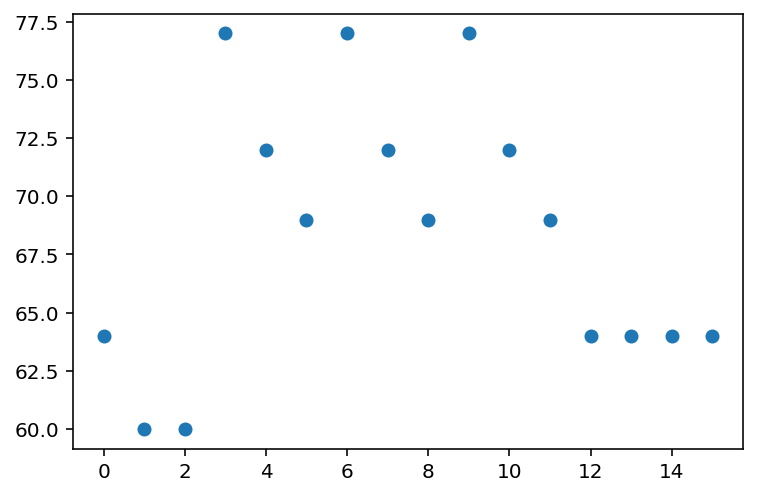

In [39]:
import matplotlib.pyplot as plt 
import numpy as np
plt.scatter(np.arange(16), notes[7]); 

In [40]:
from MIDI_utils import get_midi_data
data = get_midi_data()
print(data.shape)
print(data[0, :])

(12483, 16)
[72. 72. 76. 72. 67. 76. 72. 67. 76. 72. 67. 76. 72. 67. 76. 72.]
